## 基于 KMeans 的简单图像分割

### 相关 `Python` 库的导入

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

### 图像数据的导入

<class 'numpy.ndarray'>
(1280, 1920, 3)


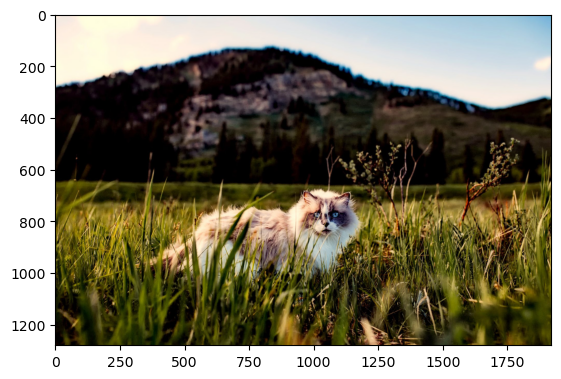

In [3]:
img = mpimg.imread("images/sky_mount_cat.jpg")
print(type(img))
print(img.shape)
plt.imshow(img)
# plt.colorbar()

### 利用 `opencv` 对图像进行缩小
> `OpenCV` 默认使用的是双线性插值（Bilinear Interpolation），它使用周围最近的 4 个像素的加权平均值来计算新的像素值。保持图像的视觉质量，尽量减少像素丢失造成的影响。

In [4]:
#将图片缩小便于可视化像素点的分布
# 图片等比例缩小 1.5 倍
resized_img = cv2.resize(img, (960,640))

(640, 960, 3)


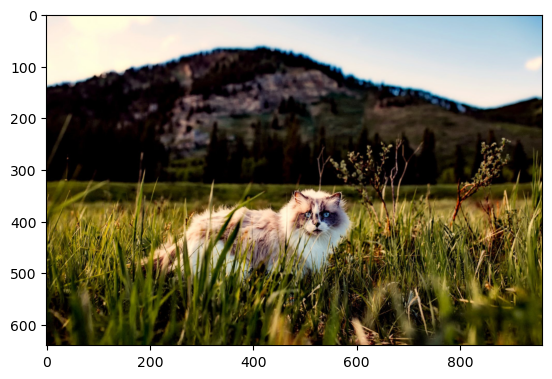

In [5]:
print(resized_img.shape)
plt.imshow(resized_img)

(256, 384, 3)


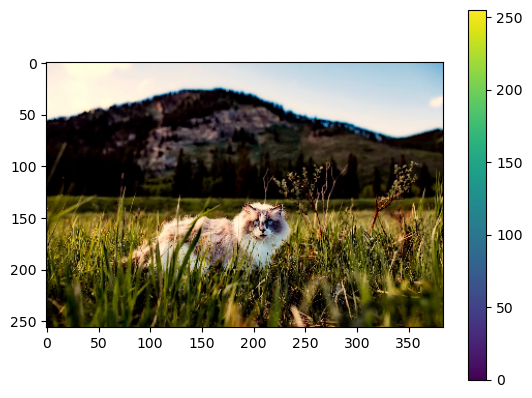

In [13]:
# 将图片等比例缩小 5 倍
resized_img_low = cv2.resize(img, (384, 256))
print(resized_img_low.shape)
plt.imshow(resized_img_low)
plt.colorbar()

###  将多维数组转换为二维数组

> 通过将多维数组 resized_img_low 重新塑造为二维数组 X，你得到了一个更容易处理和分析的数据结构。在这个二维数组中，每一行代表一个像素点的颜色信息，通常由红绿蓝（RGB）三个通道的值组成。

In [22]:
# 转化为存储图片对应像素点颜色信息的二维数组，便于可视化和后面的聚类
X = resized_img_low.reshape(-1, 3)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(98304, 3)


### 对缩小和转化后的图片可视化查看其像素点的分布

In [7]:
from mpl_toolkits.mplot3d import Axes3D

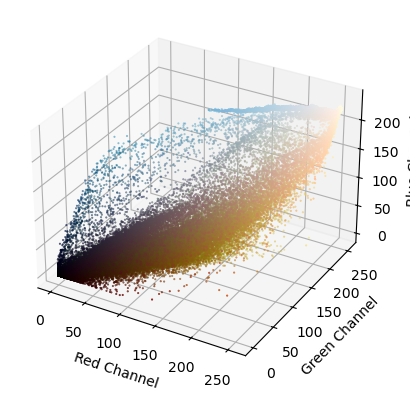

In [26]:
# X 是你的二维数组，形状为 (n, 3)，n 为像素点的数量

# 提取每个通道的值
r, g, b = X[:, 0], X[:, 1], X[:, 2]

# 创建一个新的三维坐标系
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 在三维坐标系中绘制像素点，分别以R、G、B通道的值作为X、Y、Z轴坐标
ax.scatter(r, g, b, c=X/255, marker='.', s=1)  # 将颜色值映射到[0, 1]范围

# 设置坐标轴标签
ax.set_xlabel('Red Channel')
ax.set_ylabel('Green Channel')
ax.set_zlabel('Blue Channel')

# # 设置显示图形大小
# plt.figure(figsize=(10, 8))
# 显示图形
plt.show()
